# Finding Heavy Traffic Indicators on I-94

This project is about finding heavy westbound traffic indicators on the I-94.

The goal of the project is to do explanatory data visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


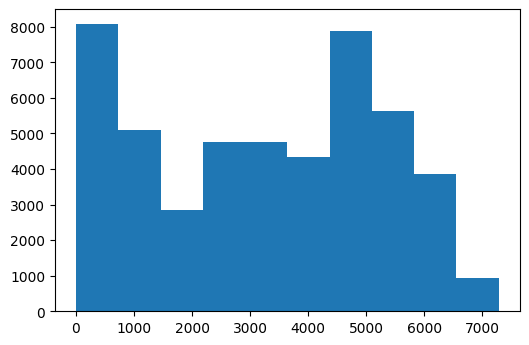

In [4]:
%matplotlib inline

plt.hist(traffic['traffic_volume'])
plt.show()

In [5]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

It would appear the traffic volume is a bimodial distribution.

In [6]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [7]:
#import datetime as dt
 
# Create two filters. On for all times larger than 7 and lower than 19
# The other for the rest.
timeMaskDay = (traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)
timeMaskNight = (traffic['date_time'].dt.hour < 7) | (traffic['date_time'].dt.hour >= 19)

In [8]:

daytimeData = traffic.loc[timeMaskDay,:]
nighttimeData = traffic.loc[timeMaskNight,:]

In [9]:
daytimeData['traffic_volume'].head()

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64

<ipython-input-10-4a151713f69d>:19: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<ipython-input-10-4a151713f69d>:26: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



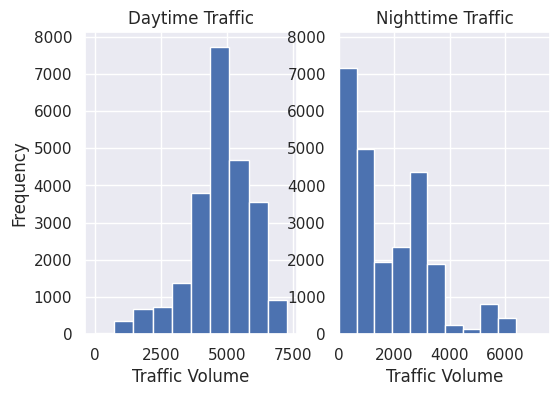

In [10]:
sns.set()

plt.subplot(1,2,1)
plt.hist(daytimeData['traffic_volume'])
plt.title("Daytime Traffic")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
ymin1, ymax1 = plt.ylim()
xmin1, xmax1 = plt.xlim()

plt.subplot(1,2,2)
plt.hist(nighttimeData['traffic_volume'])
plt.title("Nighttime Traffic")
plt.xlabel("Traffic Volume")
ymin2, ymax2 = plt.ylim()
xmin2, xmax2 = plt.xlim()

if ymax1>ymax2:
    plt.subplot(1,2,2)
    plt.ylim(0,ymax1)
else:
    plt.subplot(1,2,1)
    plt.ylim(0,ymax2)
    
if xmax1>xmax2:
    plt.subplot(1,2,2)
    plt.xlim(0,xmax1)
else:
    plt.subplot(1,2,1)
    plt.xlim(0,xmax2)
        

plt.show()


In [11]:
nighttimeData.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


In [12]:
daytimeData.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


The daytime histogram is left skewed (more traffic), while the nighttime histogram is right skewed.

The data suggests that most traffic does happen during the day. This is where we should focus.

In [13]:
traffic['month'] = traffic['date_time'].dt.month
by_month = traffic.groupby('month').mean()
by_month['traffic_volume']

month
1     3051.081378
2     3197.945547
3     3308.388611
4     3304.372388
5     3366.319432
6     3419.077413
7     3205.481752
8     3394.241891
9     3303.049334
10    3390.678376
11    3167.592784
12    3024.257943
Name: traffic_volume, dtype: float64

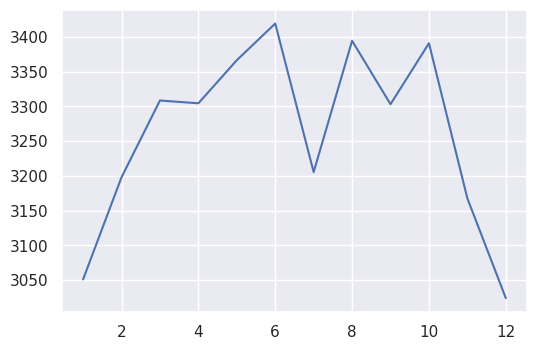

In [14]:
plt.plot(by_month['traffic_volume'])
plt.show()

There seesms to be a dip in traffic in the winter months and also in July.

In [15]:
traffic['dayofweek'] = traffic['date_time'].dt.dayofweek
by_dayofweek = traffic.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    3309.387161
1    3488.555799
2    3583.196681
3    3637.899663
4    3656.358836
5    2773.638120
6    2368.588329
Name: traffic_volume, dtype: float64

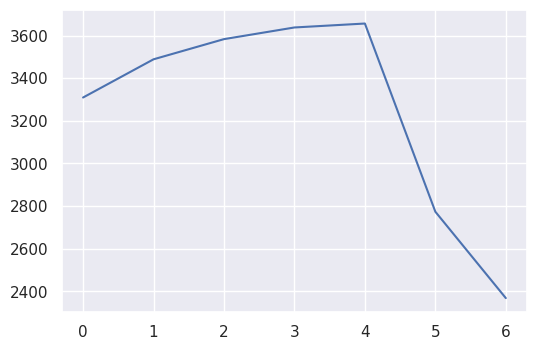

In [16]:
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

There is much more traffic during the work days. People commuting to work by cars. Sad really.

In [17]:
traffic['hour'] = traffic['date_time'].dt.hour
bussiness_days = traffic.copy()[traffic['dayofweek'] <= 4] # 4 == Friday
weekend = traffic.copy()[traffic['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
0      651.528971
1      396.913043
2      301.982818
3      362.289835
4      832.661096
5     2701.296703
6     5365.983210
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64
hour
0     1306.414035
1      805.128333
2      611.171986
3      393.611599
4      375.420168
5      639.237232
6     1089.100334
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


<ipython-input-18-ccc4df933274>:14: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

<ipython-input-18-ccc4df933274>:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



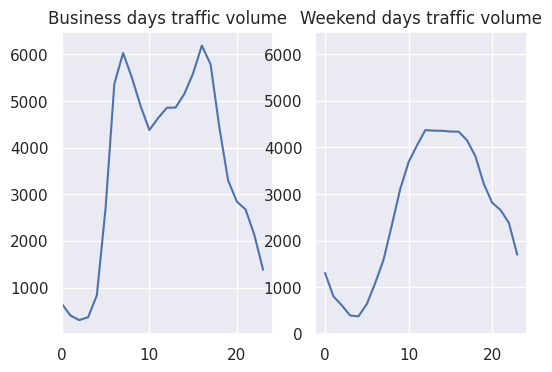

In [18]:
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Business days traffic volume')
ymin1, ymax1 = plt.ylim()
xmin1, xmax1 = plt.xlim()

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekend days traffic volume')
ymin2, ymax2 = plt.ylim()
xmin2, xmax2 = plt.xlim()

if ymax1>ymax2:
    plt.subplot(1,2,2)
    plt.ylim(0,ymax1)
else:
    plt.subplot(1,2,1)
    plt.ylim(0,ymax2)
    
if xmax1>xmax2:
    plt.subplot(1,2,2)
    plt.xlim(0,xmax1)
else:
    plt.subplot(1,2,1)
    plt.xlim(0,xmax2)
        
plt.show()



In addition to there being less traffic on the weekends, the distribution on working days is bimodal, peaking at when people go to and back from work.

Interestingly, there is more traffic on average during the evening hours on the weekends than on workdays.

In [19]:
corr = traffic.corr()['traffic_volume']
print(corr)

temp              0.130299
rain_1h           0.004714
snow_1h           0.000733
clouds_all        0.067054
traffic_volume    1.000000
month            -0.002533
dayofweek        -0.149544
hour              0.352401
Name: traffic_volume, dtype: float64


In [20]:
by_weather_main = traffic.groupby('weather_main').mean()
by_weather_description = traffic.groupby('weather_description').mean()

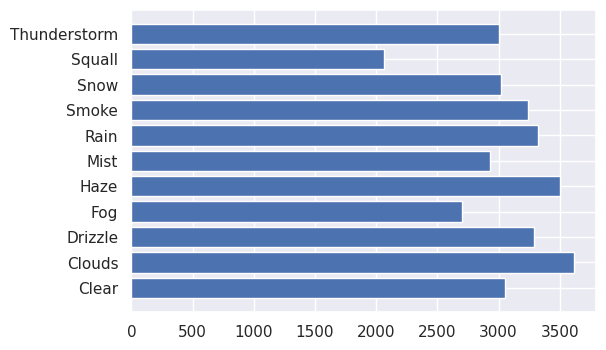

In [21]:
plt.barh(by_weather_main.index,by_weather_main['traffic_volume'])
plt.show()

There isn't a single indicator of heavy traffic.

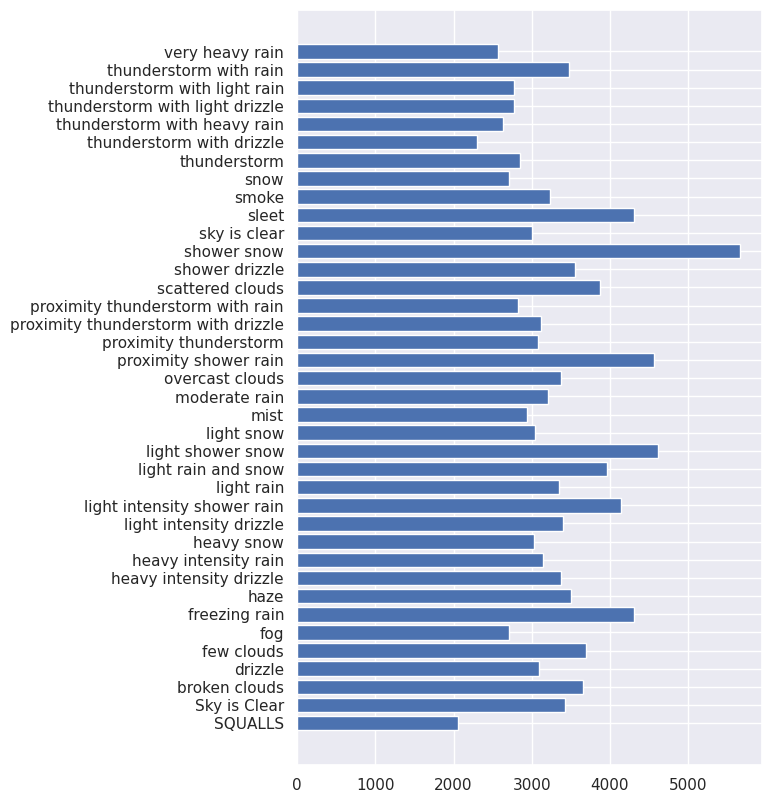

In [25]:
plt.figure(figsize=(6,10))
plt.barh(by_weather_description.index,by_weather_description['traffic_volume'])
plt.show()

There is exactly one weather type with car volume exceeding 5000 cars. It could be a heavy traffic indicator.

# Final conclusions

Besides the time of day and seasonal shifts in traffic, there doesn't seem to be any other indicator of traffic volume.

It can be speculated that this might have to do with the lack of public transport and other means of transport as well as large distances resulting from a car centric culture in the US.